In [2]:
import os
os.environ['MEMORY_LIMIT'] = '10GB'

In [3]:
import seaborn as sns
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import pandas as pd
from os.path import exists, join
from io import StringIO  
from datetime import timedelta

In [4]:
ALGORITHMS = {
    'structural': 'Structural',
    'structural-variant': 'Splitted Structural',
    'sed': 'Sed',
    'lblint': 'Lbl-Int',
    'bib': 'Binary branch',
    'sedindex': 'Sed Index',
    'lblindex': 'Lbl-Int Index',
    'structuralindex': 'Structural Index',
}

datasets = []

In [140]:
sizes = ('small', 'medium', 'big')
qsizes = (2, 4, 8)
generated_datasets = []
for dsize in sizes[:1]:
    for ti, tsize in enumerate(sizes):
        for lsize in sizes:
            generated_datasets.append( ('_'.join([dsize, f't{tsize}', f'l{lsize}']), qsizes[ti]) )

datasets = [ds[0] for ds in generated_datasets]

In [141]:
datasets

['small_tsmall_lsmall',
 'small_tsmall_lmedium',
 'small_tsmall_lbig',
 'small_tmedium_lsmall',
 'small_tmedium_lmedium',
 'small_tmedium_lbig',
 'small_tbig_lsmall',
 'small_tbig_lmedium',
 'small_tbig_lbig']

In [142]:
dataset = 'small_tsmall_lsmall'
ds_path = join('./resources/puser-results/', dataset.lower())
path = join(ds_path, 'statistics.txt')
with open(path) as f:
    lines = [l.strip() for l in f.readlines()]

names = lines[1].split(',')[:-1]
values = [float(n) for n in lines[2].split(',')]

data = { names[i]: [values[i]] for i, _ in enumerate(values) }

df = pd.DataFrame.from_dict(data)
display(df)

,min_tree,max_tree,avg_tree,tree_count,avg_distinct_label_per_tree,distinct_labels
0,10.0,100.0,54.234,500.0,0.0,101.0


In [143]:
def load_stats(dataset: str):
    ds_path = join('./resources/puser-results/', dataset.lower())
    path = join(ds_path, 'statistics.txt')
    with open(path) as f:
        lines = [l.strip() for l in f.readlines()]
    names = lines[1].split(',')[:-1]
    values = [float(n) for n in lines[2].split(',')]
    data = { names[i]: [values[i]] for i, _ in enumerate(values) }
    df = pd.DataFrame.from_dict(data)
    depths = pd.read_csv(join(ds_path, 'depths.csv'), names=['root-leaf-distance'], header=None)
    degrees = pd.read_csv(join(ds_path, 'degrees.csv'), names=['degree'], header=None)

    df.insert(0, 'Dataset', [dataset.capitalize()], True)
    df.insert(7, 'Mean node degree', [degrees['degree'].mean()])
    df.insert(7, 'Min node degree', [degrees['degree'].min()])
    df.insert(7, 'Max node degree', [degrees['degree'].max()])
    df.insert(9, 'Min tree height', [depths['root-leaf-distance'].min()])
    df.insert(9, 'Max tree height', [depths['root-leaf-distance'].max()])
    df.insert(7, 'Tree/Label ratio', df['tree_count'] / df['distinct_labels'])
    df.insert(7, 'Tree size/Label ratio', (df['avg_tree'] / df['distinct_labels']) * 100)
    df.insert(9, 'Mean tree height (root to leaf distance)', [depths['root-leaf-distance'].mean()])
    return df
    # return (df, depths, degrees)

stats_df = pd.DataFrame()
for i, ds in enumerate(datasets):
    row = int(i >= 4)
    col = i % 4
    loaded = load_stats(ds)
    stats_df = pd.concat([stats_df, loaded])

pd.set_option('display.precision', 3)

stats_df = stats_df.set_index('Dataset')
stats_df = stats_df.rename(columns={
    'mint': 'Min tree size',
    'maxt': 'Max tree size',
    'avgt': 'Average tree size',
    'avg_distinct_label_per_tree': 'Distnct labels per tree',
    'distinct_labels': 'No. of distinct labels',
    'trees': 'No. of trees in dataset',
})
display(stats_df)

,min_tree,max_tree,avg_tree,tree_count,Distnct labels per tree,No. of distinct labels,Tree size/Label ratio,Tree/Label ratio,Mean tree height (root to leaf distance),Max node degree,Min node degree,Max tree height,Min tree height,Mean node degree
Dataset,,,,,,,,,,,,,,
Small_tsmall_lsmall,10.0,100.0,54.234,500.0,0.000,101.0,53.697,4.950e+00,4.217,11,1,13,1,1.963
Small_tsmall_lmedium,10.0,100.0,54.684,500.0,0.000,1001.0,5.463,4.995e-01,4.171,12,1,12,1,1.963
Small_tsmall_lbig,10.0,100.0,54.878,500.0,3.548,9367.0,0.586,5.338e-02,4.210,12,1,13,1,1.964
Small_tmedium_lsmall,100.0,998.0,554.876,500.0,0.000,1001.0,55.432,4.995e-01,6.493,16,1,18,1,1.996
Small_tmedium_lmedium,102.0,1000.0,543.602,500.0,0.000,10001.0,5.435,5.000e-02,6.502,16,1,18,1,1.996
Small_tmedium_lbig,101.0,998.0,559.178,500.0,34.062,93749.0,0.596,5.333e-03,6.589,18,1,20,1,1.996
Small_tbig_lsmall,1004.0,9989.0,5548.754,500.0,0.000,10001.0,55.482,5.000e-02,8.826,20,1,24,1,2.000
Small_tbig_lmedium,1017.0,9981.0,5615.998,500.0,0.000,100001.0,5.616,5.000e-03,8.786,21,1,24,1,2.000
Small_tbig_lbig,1002.0,9997.0,5424.986,500.0,360.870,933878.0,0.581,5.354e-04,8.810,19,1,24,1,2.000


In [144]:
ALGORITHMS_ENUM_NAMES = {
    'structural': 'Structural',
    'structural-variant': 'StructuralVariant',
    'sed': 'Sed',
    'lblint': 'Lblint',
    'bib': 'Bib'
}

In [145]:
from os.path import join

In [146]:
df = pd.DataFrame()
cdf = pd.DataFrame()
for ds in datasets:
    times_path = join('resources/puser-results', ds, 'times.txt')
    t = pd.read_csv(times_path, delimiter=';')
    t = t.rename(columns=ALGORITHMS)
    df = pd.concat([df, t.head(1)])
    
    cdf = pd.concat([cdf, t.iloc[[1]]])
df = df.set_index('dataset')
cdf = cdf.set_index('dataset')
# display(df)
# display(df.transpose())
display(cdf)

,Lbl-Int Index,Lbl-Int,Sed Index,Sed,Structural Index,Structural
dataset,,,,,,
small_tsmall_lsmall,1288,1288,931,931,1098,1098
small_tsmall_lmedium,343,343,322,322,333,333
small_tsmall_lbig,359,359,358,358,358,358
small_tmedium_lsmall,200,200,200,200,200,200
small_tmedium_lmedium,200,200,200,200,200,200
small_tmedium_lbig,200,200,200,200,200,200
small_tbig_lsmall,200,200,200,200,200,200
small_tbig_lmedium,200,200,200,200,200,200
small_tbig_lbig,200,200,200,200,200,200


In [147]:
import io

In [148]:
stats_df.at['Small_tsmall_lsmall', 'tree_count']

np.float64(500.0)

In [149]:
pdf = pd.DataFrame()
vdf = pd.DataFrame()
for ds in datasets:
    temp_df = pd.DataFrame.from_dict({ 'dataset': [ds] })
    tv_df = pd.DataFrame.from_dict({ 'Dataset': [ds] })
    times_ = []
    total_trees_count = stats_df.at[ds.capitalize(), 'tree_count']
    methods = ['Lbl-Int Index', 'Lbl-Int', 'Sed Index', 'Sed', 'Structural Index', 'Structural']
    for mtd in ('Lblint', 'Sed', 'Structural'):
        k = mtd.replace('Lblint', 'Lbl-Int')
        candidate_count = cdf[k][ds]
        verification_path = join('resources/puser-results', ds, f'{mtd}-verification.txt')
        with open(verification_path) as f:
            lines = f.read().split('\n')
        times = pd.Series([float(t) for t in lines[:candidate_count]])
        correct_results = lines[candidate_count:]
        correct_df = pd.read_csv(io.StringIO('\n'.join(correct_results)), header=None, names=['Q', 'CT'])
        precision =  (len(lines) - 1 - candidate_count) / candidate_count
        temp_df[mtd] = precision
        temp_df
        total_verification_time_ms = times.div(1000_000).sum()
        # twice for index version
        times_.extend([total_verification_time_ms, total_verification_time_ms])
        # print(ds, mtd, precision)
    # temp_df = pd.DataFrame()
    selectivity_df = correct_df.groupby('Q').size().reset_index(name='total_matches')
    selectivity_df['selectivity'] = (selectivity_df['total_matches'] /  total_trees_count) * 100
    display(selectivity_df['selectivity'].mean())
    pdf = pd.concat([pdf, temp_df])
    vdf = pd.concat([vdf, pd.DataFrame.from_dict({'Dataset': [ds] * 6, 'process_part': ['verification'] * 6, 'Method': methods, 'Time': times_, }) ])

pdf = pdf.set_index("dataset")
vdf.sort_values(['Method', 'Dataset'], inplace=True)
display(pdf)
# display(vdf)


np.float64(0.6169999999999999)

np.float64(0.251)

np.float64(0.24699999999999997)

np.float64(0.2)

np.float64(0.2)

np.float64(0.2)

np.float64(0.2)

np.float64(0.2)

np.float64(0.2)

,Lblint,Sed,Structural
dataset,,,
small_tsmall_lsmall,0.479,0.663,0.562
small_tsmall_lmedium,0.732,0.780,0.754
small_tsmall_lbig,0.688,0.690,0.690
small_tmedium_lsmall,1.000,1.000,1.000
small_tmedium_lmedium,1.000,1.000,1.000
small_tmedium_lbig,1.000,1.000,1.000
small_tbig_lsmall,1.000,1.000,1.000
small_tbig_lmedium,1.000,1.000,1.000
small_tbig_lbig,1.000,1.000,1.000


Printing  small_tsmall_lsmall
Printing  small_tsmall_lmedium
Printing  small_tsmall_lbig
Printing  small_tmedium_lsmall
Printing  small_tmedium_lmedium
Printing  small_tmedium_lbig
Printing  small_tbig_lsmall
Printing  small_tbig_lmedium
Printing  small_tbig_lbig


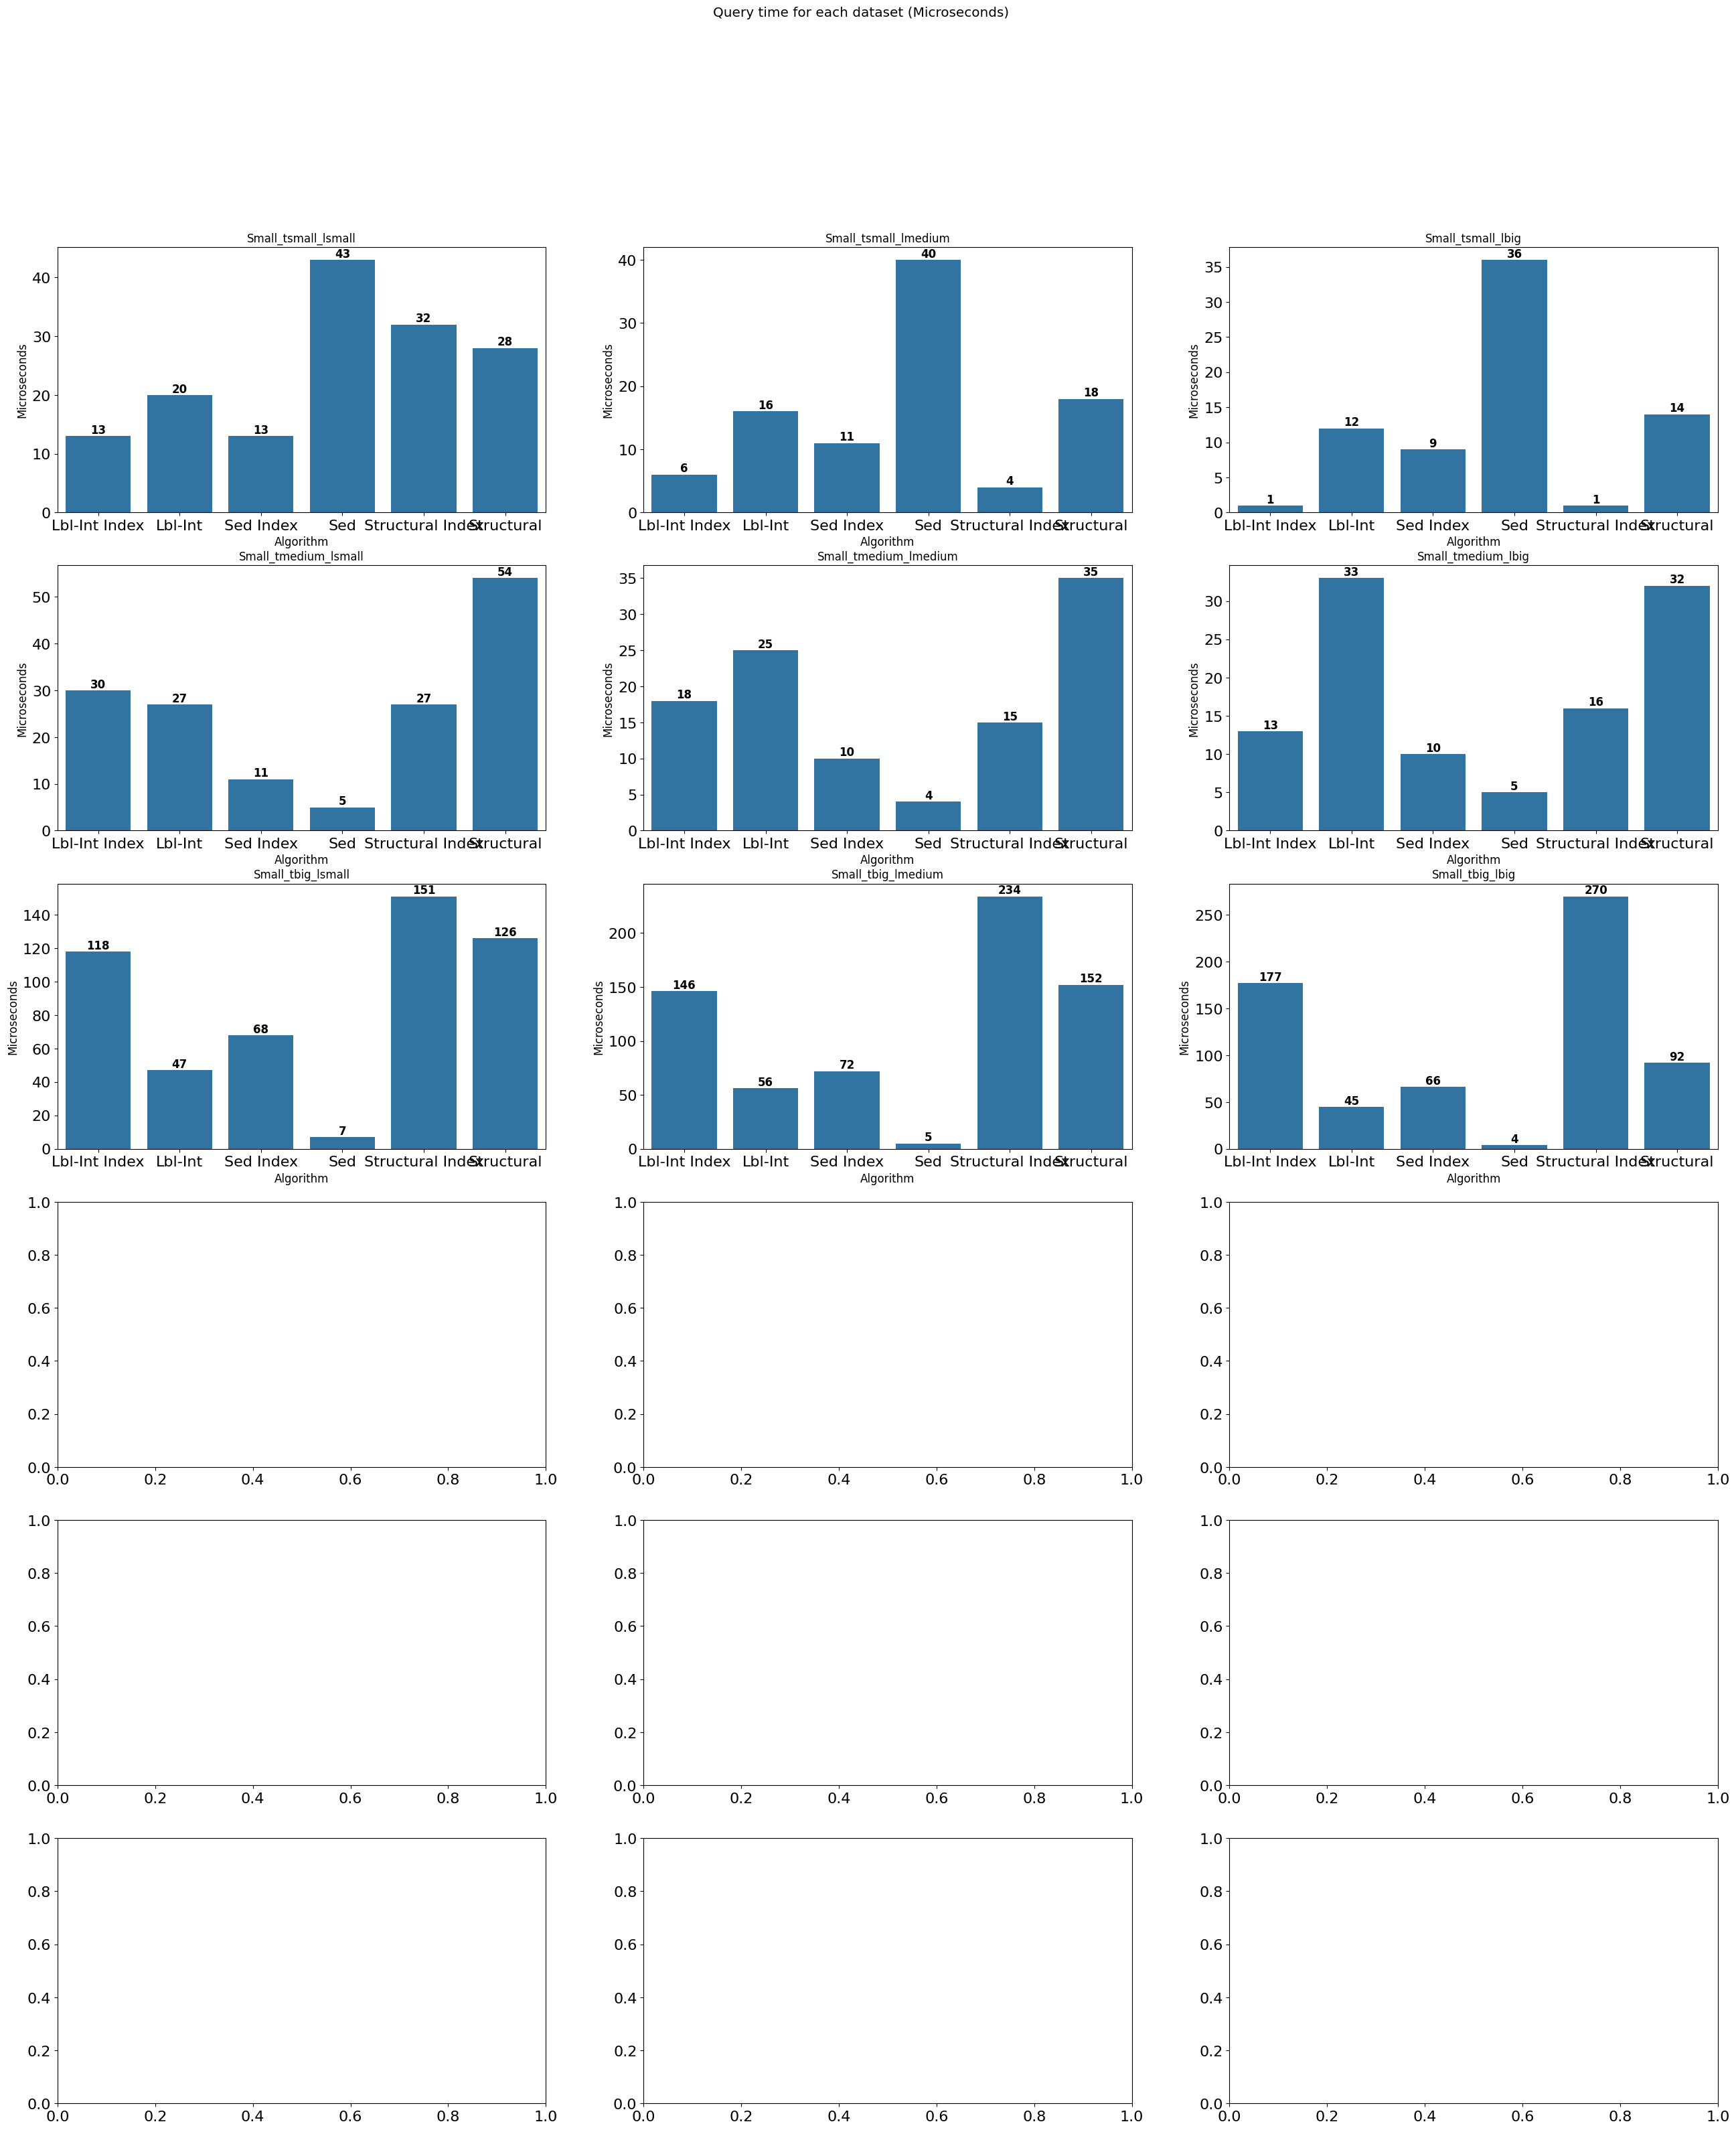

In [150]:
f, axes = plt.subplots(6, 3, figsize=(32, 18 * 2))
tdf = df.transpose()
f.suptitle('Query time for each dataset (Microseconds)')

# Custom color palette
axes
for (i, ds), axis in zip(enumerate(datasets), axes.ravel()):
    # ax = i % 3
    # ay = i % 3 + i // 3
    axis.set_title(ds.capitalize())
    print('Printing ', ds)
    bp = sns.barplot(tdf[ds], ax=axis)
    bp.set(xlabel='Algorithm', ylabel='Microseconds')
    bp.set_title(ds.capitalize())

    # Add value annotations on top of each bar
    for i, v in enumerate(tdf[ds]):
        axis.text(i, v, str(v), 
                ha='center', va='bottom',  # horizontally centered, placed just above the bar
                fontweight='bold')


In [151]:
# Set global font sizes
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 16,
    'legend.title_fontsize': 18
})

[Text(0.5, 1.0, 'Query search precision')]

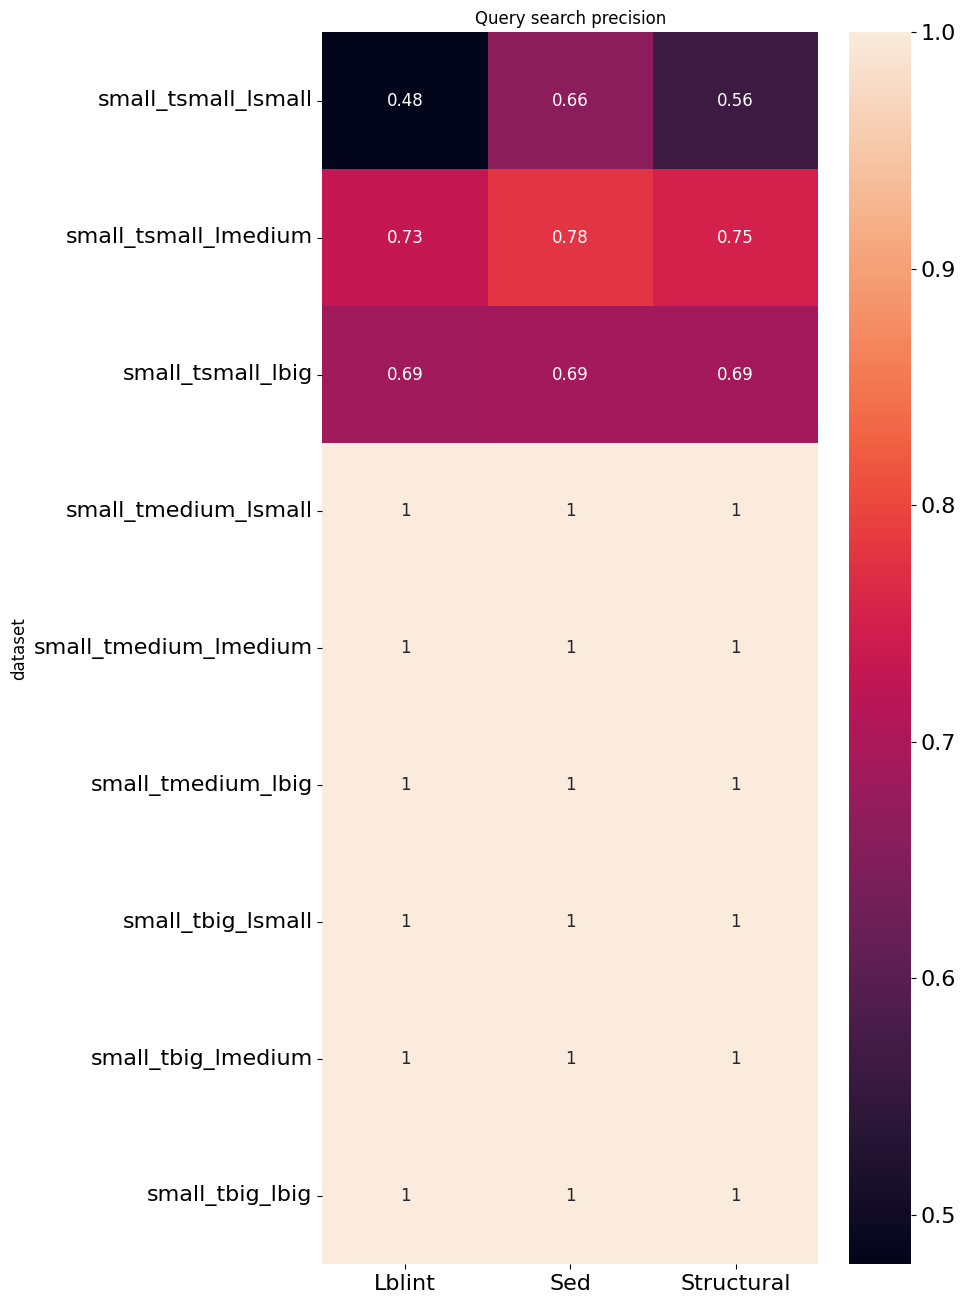

In [152]:
fig, ax = plt.subplots(figsize=(8,16))
hp = sns.heatmap(data=pdf, annot=True, ax=ax)
hp.set(title='Query search precision')

In [153]:
vdf

,Dataset,process_part,Method,Time
1,small_tbig_lbig,verification,Lbl-Int,13600.084
1,small_tbig_lmedium,verification,Lbl-Int,13809.709
1,small_tbig_lsmall,verification,Lbl-Int,12887.985
1,small_tmedium_lbig,verification,Lbl-Int,1164.745
1,small_tmedium_lmedium,verification,Lbl-Int,1168.815
1,small_tmedium_lsmall,verification,Lbl-Int,1199.350
1,small_tsmall_lbig,verification,Lbl-Int,124.438
1,small_tsmall_lmedium,verification,Lbl-Int,133.332
1,small_tsmall_lsmall,verification,Lbl-Int,274.935
0,small_tbig_lbig,verification,Lbl-Int Index,13600.084


Printing  small_tsmall_lsmall
Printing  small_tsmall_lmedium
Printing  small_tsmall_lbig
Printing  small_tmedium_lsmall
Printing  small_tmedium_lmedium
Printing  small_tmedium_lbig
Printing  small_tbig_lsmall
Printing  small_tbig_lmedium
Printing  small_tbig_lbig


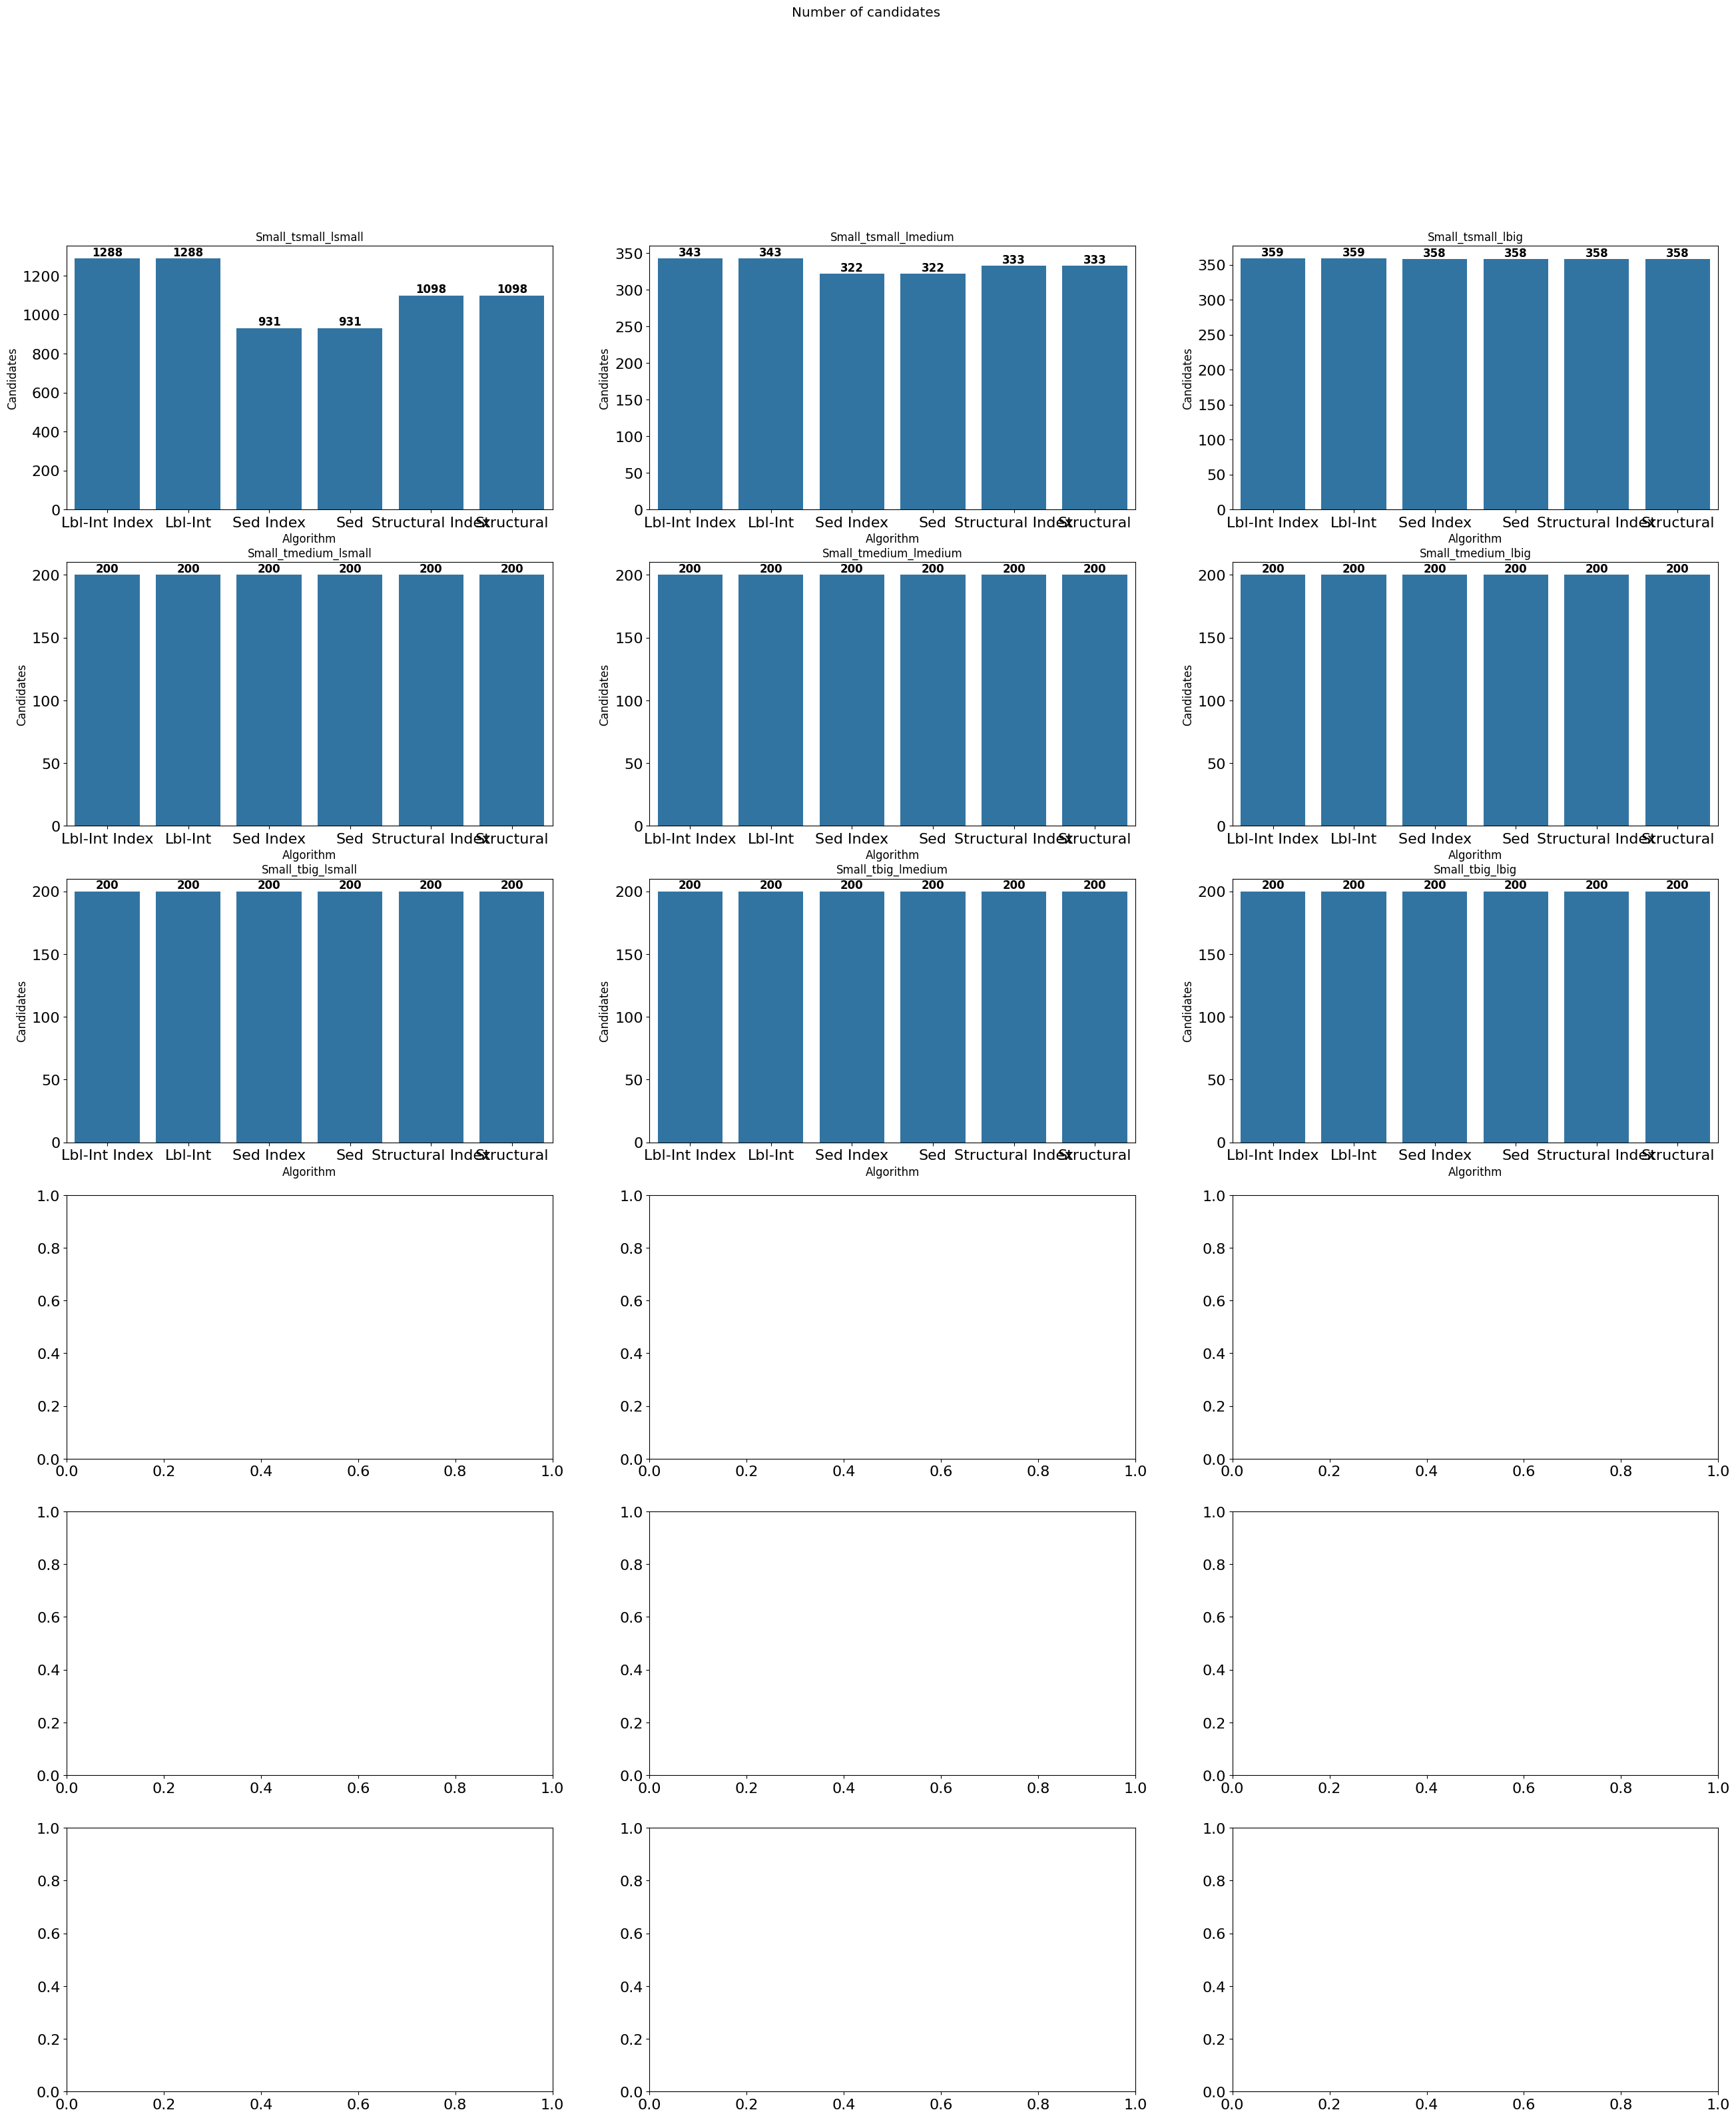

In [154]:
f, axes = plt.subplots(6, 3, figsize=(32, 18 * 2))
tdf = cdf.transpose()
f.suptitle('Number of candidates')

# Custom color palette

for (i, ds), axis in zip(enumerate(datasets), axes.ravel()):
    axis.set_title(ds.capitalize())
    print('Printing ', ds)
    bp = sns.barplot(tdf[ds], ax=axis)
    bp.set(xlabel='Algorithm', ylabel='Candidates')
    bp.set_title(ds.capitalize())

    # Add value annotations on top of each bar
    for i, v in enumerate(tdf[ds]):
        axis.text(i, v, str(v), 
                ha='center', va='bottom',  # horizontally centered, placed just above the bar
                fontweight='bold')

In [155]:
df['Dataset'] = df.index

In [156]:
df

,Lbl-Int Index,Lbl-Int,Sed Index,Sed,Structural Index,Structural,Dataset
dataset,,,,,,,
small_tsmall_lsmall,13,20,13,43,32,28,small_tsmall_lsmall
small_tsmall_lmedium,6,16,11,40,4,18,small_tsmall_lmedium
small_tsmall_lbig,1,12,9,36,1,14,small_tsmall_lbig
small_tmedium_lsmall,30,27,11,5,27,54,small_tmedium_lsmall
small_tmedium_lmedium,18,25,10,4,15,35,small_tmedium_lmedium
small_tmedium_lbig,13,33,10,5,16,32,small_tmedium_lbig
small_tbig_lsmall,118,47,68,7,151,126,small_tbig_lsmall
small_tbig_lmedium,146,56,72,5,234,152,small_tbig_lmedium
small_tbig_lbig,177,45,66,4,270,92,small_tbig_lbig


In [157]:
df['process_part'] = 'searching'

In [158]:
vdf['process_part'] = 'verification'

In [159]:
ldf = df.melt(id_vars=["Dataset", "process_part"], var_name="Method", value_name="Time", value_vars=['Lbl-Int Index', 'Lbl-Int', 'Sed Index', 'Sed', 'Structural Index', 'Structural'])

In [160]:
complete = pd.concat([ldf, vdf])

In [161]:
import seaborn.objects as so

In [162]:
plot_data = complete.pivot_table(
    index=['Dataset', 'Method'],
    columns='process_part',
    values='Time'
).reset_index()

In [163]:
plot_data

process_part,Dataset,Method,searching,verification
0,small_tbig_lbig,Lbl-Int,45.0,13600.084
1,small_tbig_lbig,Lbl-Int Index,177.0,13600.084
2,small_tbig_lbig,Sed,4.0,13569.992
3,small_tbig_lbig,Sed Index,66.0,13569.992
4,small_tbig_lbig,Structural,92.0,13512.420
5,small_tbig_lbig,Structural Index,270.0,13512.420
6,small_tbig_lmedium,Lbl-Int,56.0,13809.709
7,small_tbig_lmedium,Lbl-Int Index,146.0,13809.709
8,small_tbig_lmedium,Sed,5.0,13908.515
9,small_tbig_lmedium,Sed Index,72.0,13908.515


In [164]:
from matplotlib.scale import ScaleBase

In [165]:
# Set global font sizes
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 16,
    'legend.title_fontsize': 18
})

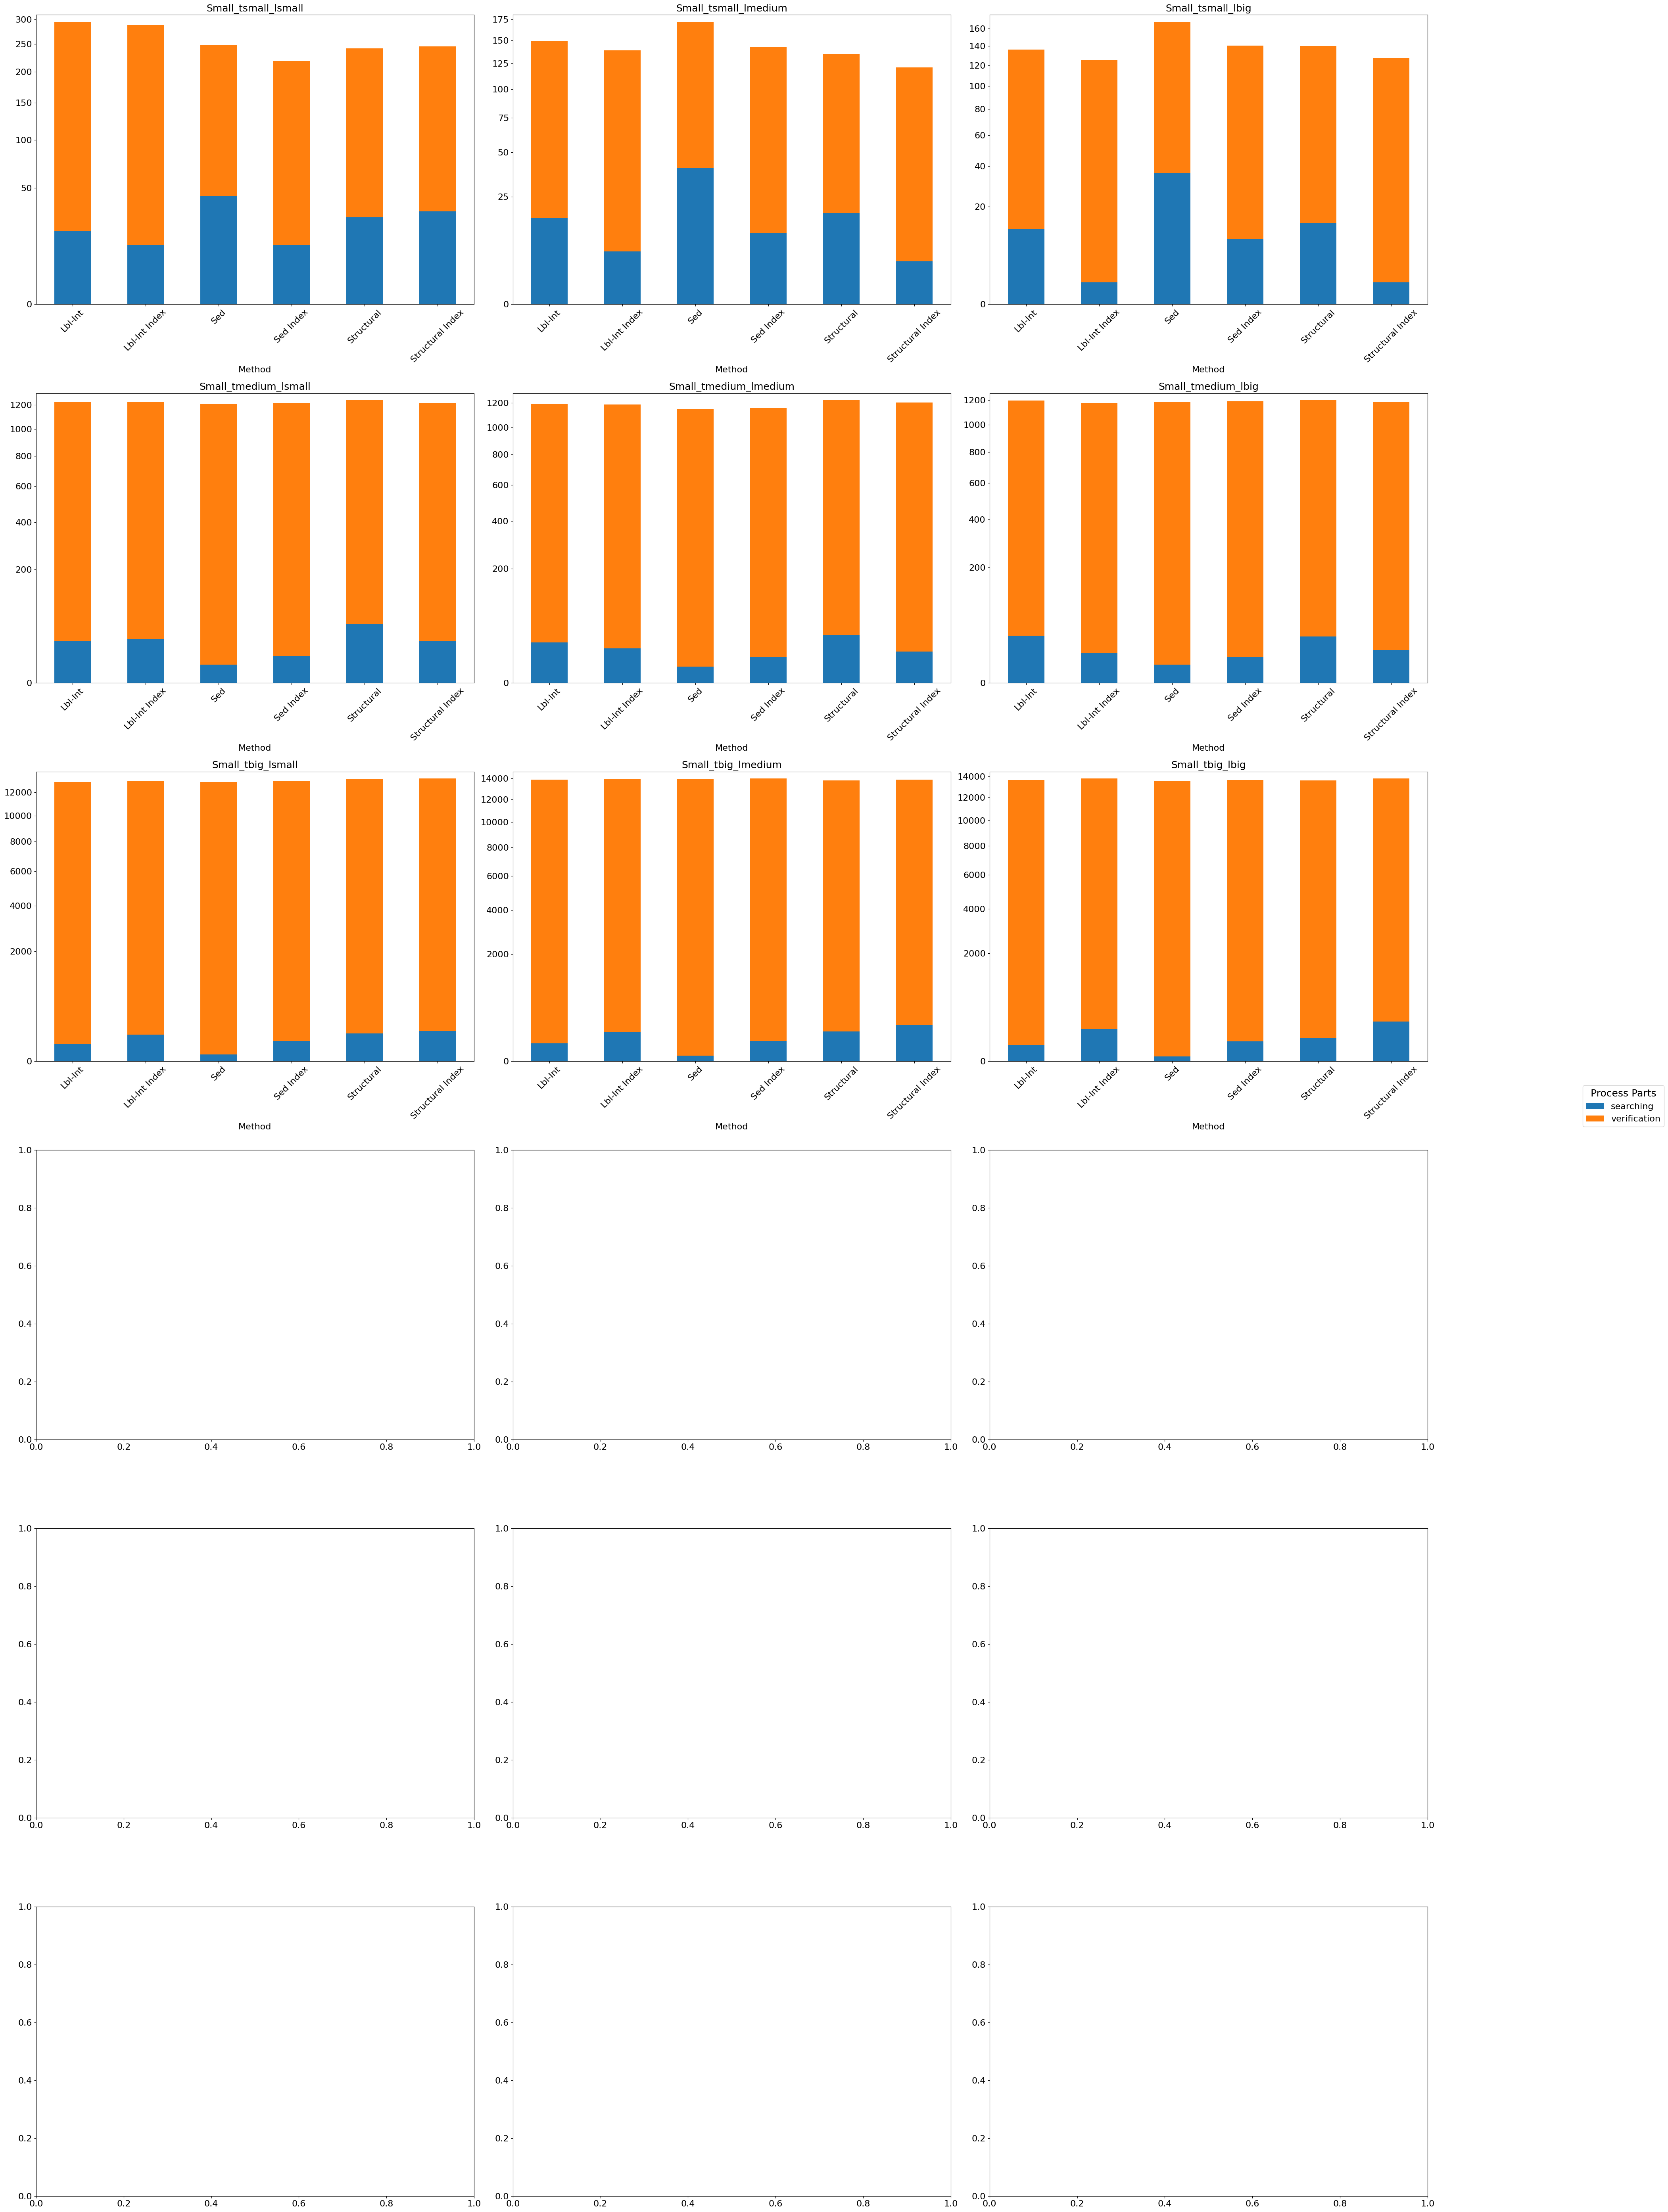

In [166]:
# Create subplot for each dataset
fig, axes = plt.subplots(6, 3, figsize=(38, 28 * 2))
# Keep track of legend handles and labels
legend_handles = []
legend_labels = []
for dataset, ax in zip(complete['Dataset'].unique(), axes.ravel()):
    dataset_data = plot_data[plot_data['Dataset'] == dataset].set_index('Method')
    plot = dataset_data.drop('Dataset', axis=1).plot(
        kind='bar',
        stacked=True,
        ax=ax,
        legend=False,
        title=dataset.capitalize(),
    )
    ax.set_xlabel('Method')
    ax.tick_params(axis='x', rotation=45)
    # Set sqrt scale
    # ax.set_yscale('log')
    ax.set_yscale('function', functions=(lambda x: np.sqrt(x), lambda x: x**2))

    ax.set_ylim(bottom=0)

    # Remove individual legends
    # ax.get_legend().remove()
    if dataset == complete['Dataset'].unique()[0]:
        legend_handles = plot.containers
        legend_labels = dataset_data.drop('Dataset', axis=1).columns

# Add single legend outside plots
fig.legend(
    legend_handles, 
    legend_labels,
    title='Process Parts',
    bbox_to_anchor=(1.05, 0.5),
    loc='center left'
)
# Adjust layout
plt.tight_layout()

# Add extra space for legend
plt.subplots_adjust(right=0.95)


# Show plot
plt.show()